In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Análisis de los datos dentro del parquet.

In [2]:
#Leer el archivo parquet
df = pd.read_parquet('NYC_air_quality.parquet')

#Obtener la cantidad de elementos en el DataFrame
cantidad_elementos = df.size

#Obtener la cantidad de valores nulos por columna
cantidad_nulos_por_columna = df.isnull().sum()

#Obtener el tipo de dato en cada columna
tipos_de_dato_por_columna = df.dtypes

#Obtener una descripción estadística del DataFrame
descripcion_estadistica = df.describe()

#Imprimir los resultados
print("Cantidad de elementos en el DataFrame:", cantidad_elementos)
print("\nCantidad de valores nulos por columna:")
print(cantidad_nulos_por_columna)
print("\nTipo de dato en cada columna:")
print(tipos_de_dato_por_columna)
print("\nDescripción estadística del DataFrame:")
print(descripcion_estadistica)

Cantidad de elementos en el DataFrame: 71825

Cantidad de valores nulos por columna:
contaminante    0
Measure Info    0
fecha           0
Data Value      0
Barrio          0
dtype: int64

Tipo de dato en cada columna:
contaminante            object
Measure Info            object
fecha           datetime64[ns]
Data Value             float64
Barrio                  object
dtype: object

Descripción estadística del DataFrame:
                               fecha    Data Value
count                          14365  14365.000000
mean   2015-06-07 08:08:17.208492800     16.804504
min              2005-01-01 00:00:00      0.600000
25%              2011-12-01 00:00:00      9.000000
50%              2015-06-01 00:00:00     14.300000
75%              2019-01-01 00:00:00     24.500000
max              2022-06-01 00:00:00     50.600000
std                              NaN      9.098905


Listamos el contenido dentro de la columna 'contaminante'.

In [3]:
#Obtener los elementos únicos de la columna 'contaminante'
contaminantes_unicos = df['contaminante'].unique()

#Imprimir los elementos únicos
print(contaminantes_unicos)

['Outdoor Air Toxics - Formaldehyde' 'Outdoor Air Toxics - Benzene'
 'Nitrogen dioxide (NO2)' 'Fine particles (PM 2.5)' 'Ozone (O3)']


Concentración promedio anual por indicador. Calcula la concentración promedio anual por[mcg/m3] para cada indicador de contaminante.

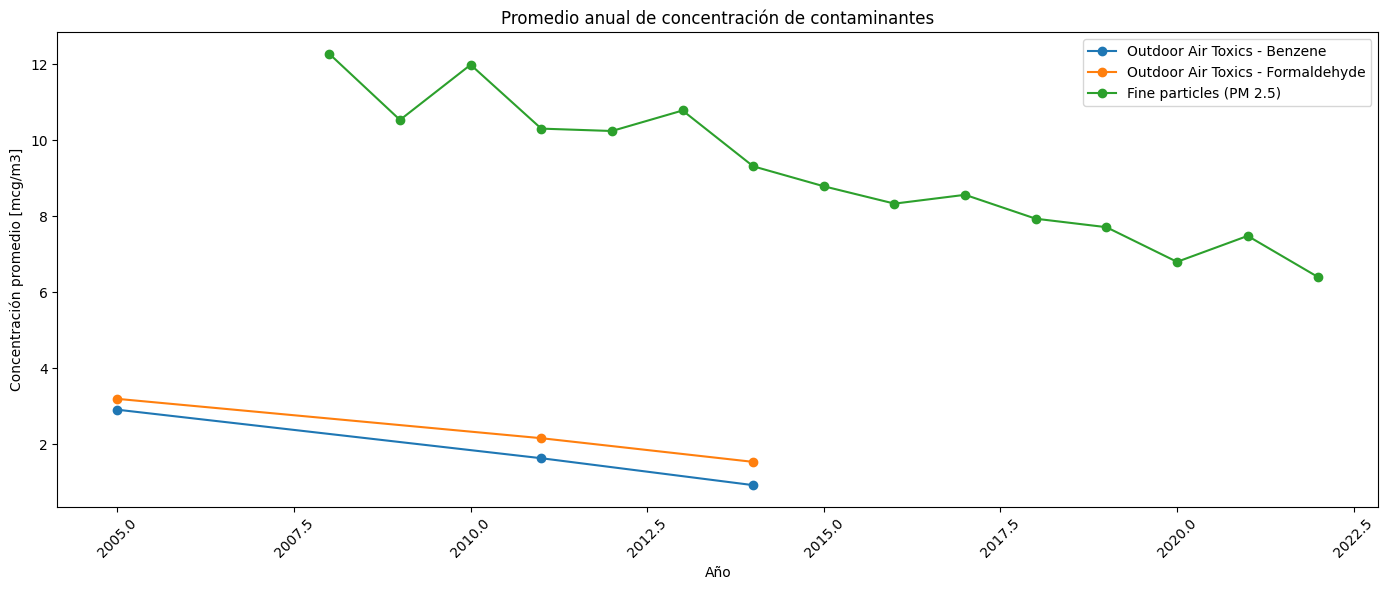

In [6]:
#Filtrar las filas que tienen medida en mcg/m3
df_mcg = df[df['Measure Info'] == 'mcg/m3']

#Filtrar las filas que corresponden a los contaminantes deseados
contaminantes_deseados = ['Outdoor Air Toxics - Benzene', 'Outdoor Air Toxics - Formaldehyde', 'Fine particles (PM 2.5)']
contaminantes_data = df_mcg[df_mcg['contaminante'].isin(contaminantes_deseados)]

#Convertir la columna 'fecha' a tipo datetime
contaminantes_data['fecha'] = pd.to_datetime(contaminantes_data['fecha'])

#Crear un diccionario para almacenar los DataFrames de cada contaminante
contaminantes_dfs = {}

#Calcular el promedio anual de los datos de cada contaminante
for contaminante in contaminantes_deseados:
    contaminante_data = contaminantes_data[contaminantes_data['contaminante'] == contaminante]
    contaminante_promedio_anual = contaminante_data.groupby(contaminante_data['fecha'].dt.year)['Data Value'].mean()
    contaminantes_dfs[contaminante] = contaminante_promedio_anual

#Crear el gráfico de líneas para cada contaminante
plt.figure(figsize=(14, 6))
for contaminante, promedio_anual in contaminantes_dfs.items():
    plt.plot(promedio_anual.index, promedio_anual, marker='o', linestyle='-', label=contaminante)

plt.title('Promedio anual de concentración de contaminantes')
plt.xlabel('Año')
plt.ylabel('Concentración promedio [mcg/m3]')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Concentración promedio anual por indicador. Calcula la concentración promedio anual por [ppb] para cada indicador de contaminante.

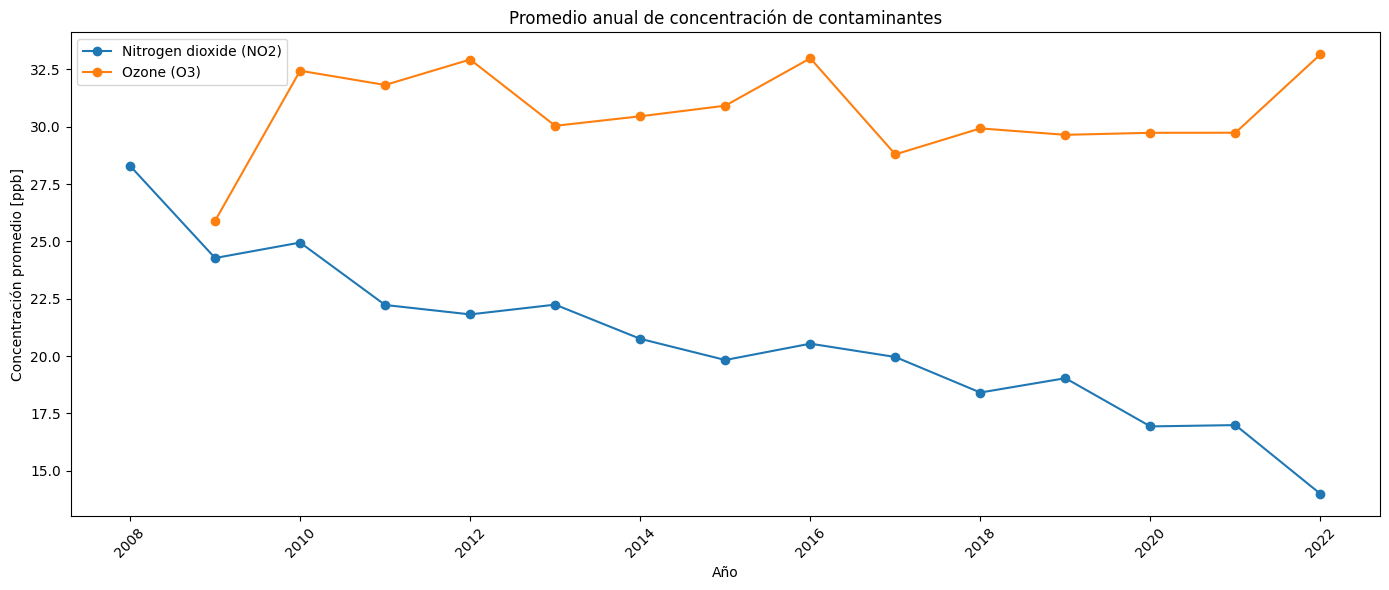

In [7]:
#Filtrar las filas que tienen medida en mcg/m3
df_ppb = df[df['Measure Info'] == 'ppb']

#Filtrar las filas que corresponden a los contaminantes deseados
contaminantes_deseados = ['Nitrogen dioxide (NO2)', 'Ozone (O3)']
contaminantes_data = df_ppb[df_ppb['contaminante'].isin(contaminantes_deseados)]

#Convertir la columna 'fecha' a tipo datetime
contaminantes_data['fecha'] = pd.to_datetime(contaminantes_data['fecha'])

#Crear un diccionario para almacenar los DataFrames de cada contaminante
contaminantes_dfs = {}

#Calcular el promedio anual de los datos de cada contaminante
for contaminante in contaminantes_deseados:
    contaminante_data = contaminantes_data[contaminantes_data['contaminante'] == contaminante]
    contaminante_promedio_anual = contaminante_data.groupby(contaminante_data['fecha'].dt.year)['Data Value'].mean()
    contaminantes_dfs[contaminante] = contaminante_promedio_anual

#Crear el gráfico de líneas para cada contaminante
plt.figure(figsize=(14, 6))
for contaminante, promedio_anual in contaminantes_dfs.items():
    plt.plot(promedio_anual.index, promedio_anual, marker='o', linestyle='-', label=contaminante)

plt.title('Promedio anual de concentración de contaminantes')
plt.xlabel('Año')
plt.ylabel('Concentración promedio [ppb]')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Se puede ver una notable baja en los niveles de contaminación. No obstante, no son valores para estar tranquilos. De cara a dar pelea contra la crisis medioambiental, utlizar vehículos eléctricos es una gran idea para implementar, esta misma, nos ayudaría a tomar un camino más sustentable.

Nivel de concentracion por Barrio.

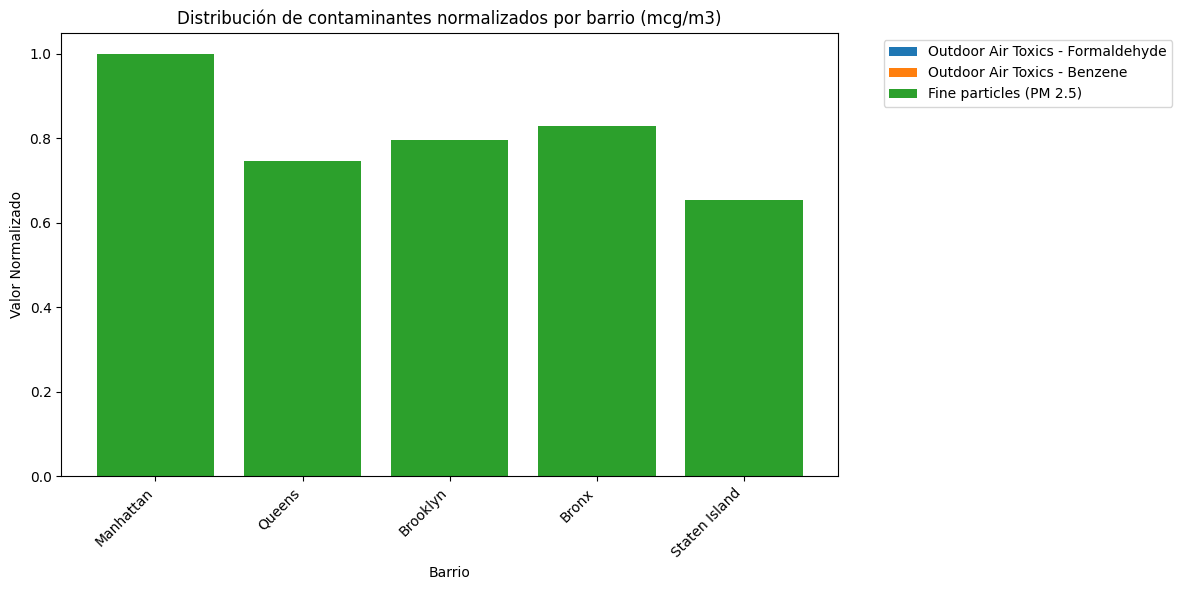

In [9]:
#Filtrar el DataFrame por medida de información específica
medida_info = 'mcg/m3'
df_filtrado = df[df['Measure Info'] == medida_info].copy()  # Hacemos una copia para evitar la vista

#Normalizar los valores de los contaminantes
scaler = MinMaxScaler()
df_filtrado['data_value_normalized'] = scaler.fit_transform(df_filtrado[['Data Value']])

#Crear el gráfico de barras
plt.figure(figsize=(12, 6))
for contaminante in df_filtrado['contaminante'].unique():
    datos_contaminante = df_filtrado[df_filtrado['contaminante'] == contaminante]
    barrios = datos_contaminante['Barrio']
    plt.bar(barrios, datos_contaminante['data_value_normalized'], label=contaminante)

plt.xlabel('Barrio')
plt.ylabel('Valor Normalizado')
plt.title('Distribución de contaminantes normalizados por barrio (' + medida_info + ')')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

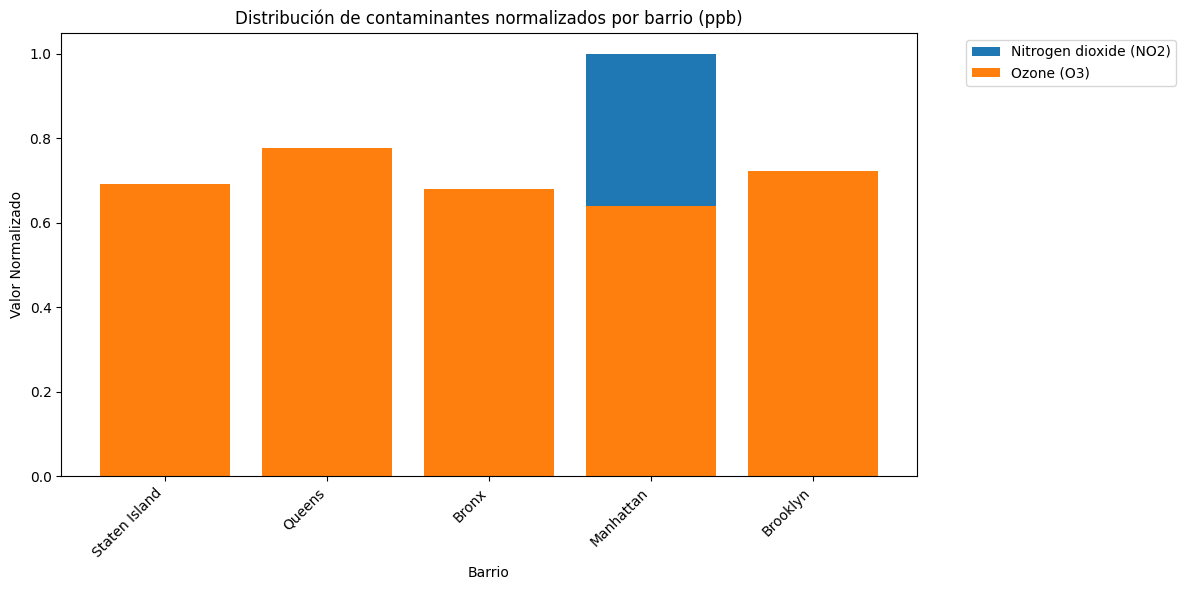

In [10]:
medida_info = 'ppb'
df_filtrado = df[df['Measure Info'] == medida_info].copy()  # Hacemos una copia para evitar la vista

# Normalizar los valores de los contaminantes
scaler = MinMaxScaler()
df_filtrado['data_value_normalized'] = scaler.fit_transform(df_filtrado[['Data Value']])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
for contaminante in df_filtrado['contaminante'].unique():
    datos_contaminante = df_filtrado[df_filtrado['contaminante'] == contaminante]
    barrios = datos_contaminante['Barrio']
    plt.bar(barrios, datos_contaminante['data_value_normalized'], label=contaminante)

plt.xlabel('Barrio')
plt.ylabel('Valor Normalizado')
plt.title('Distribución de contaminantes normalizados por barrio (' + medida_info + ')')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Los gráficos hablan por sí solos. Está a la vista que los barrios tienen una gran concentración de contaminantes. De ellos, el más alarmante es Manhattan, que no deja excluido a ninguno de los contaminantes evaluados. Todo esto parece tener una directa relación con el tráfico vehicular intenso que caracteriza a esta ciudad. 
Por esto mismo, se trae a colación la ocurrencia de implementar metodologías que fomenten la adopción de vehículos que no contaminen, principalmente en el sector de transporte de pasajeros, ya que, la famosísima gran manzana, parece estar envenanada.